# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [26]:
result = pd.read_csv("..//final_data//result_data.csv")

### Some info about data frame

In [27]:
result

,id,total_time,mean_speed,max_speed,min_speed,total_distance,mean_acceleration,max_acceleration,min_acceleration,sd_acceleration,...,average_pitch,median_pitch,min_pitch,max_pitch,sd_pitch,average_yaw,median_yaw,min_yaw,max_yaw,sd_yaw
0,cycling_1,180.007026,12.390490,25.226319,0.000000,0.691279,9.839644,33.370849,1.000849,2.208068,...,0.920359,0.997693,-0.676056,1.567361,0.305094,1.273406,1.437144,-3.136301,3.120038,0.829768
1,cycling_2,430.007260,18.063342,49.625282,0.000000,2.380647,9.863310,46.913085,1.001542,2.261824,...,0.488994,0.508881,-0.774307,1.139378,0.254460,-1.298452,-0.901927,-2.978770,1.257827,0.946952
2,cycling_3,363.860082,20.854885,27.663918,0.000000,2.275249,9.978553,76.925077,0.575971,2.858391,...,0.390804,0.397393,-0.764246,1.528574,0.269638,-1.042423,-1.396147,-2.532841,2.398587,0.907992
3,cycling_4,1029.075131,15.069146,28.373773,0.000025,4.654398,9.912809,72.929734,0.118906,2.795965,...,0.918021,0.972495,-1.290022,1.569820,0.275410,-0.254119,-0.155153,-3.141519,3.141530,1.391417
4,cycling_5,1311.223425,15.258023,27.796914,0.000000,6.044124,9.939778,68.412531,0.249030,2.771427,...,0.439639,0.458969,-0.722621,1.251450,0.219892,0.714380,0.853866,-3.141581,3.141590,1.678895
5,cycling_6,533.992808,19.686716,38.698239,0.000000,3.113731,9.825505,58.775965,0.548410,2.432842,...,0.657150,0.736892,-0.682453,1.567613,0.318555,-0.666067,-0.500597,-3.141049,3.140813,1.154993
6,cycling_7,341.845532,21.926998,54.531821,0.000000,2.310182,9.883083,69.647042,0.933491,2.665324,...,0.544492,0.601517,-0.715595,1.360833,0.320639,-0.889273,-1.238989,-2.899235,1.325698,0.922948
7,sitting_8,467.038277,1.247948,18.418591,0.000000,0.213102,9.724355,28.370767,4.133900,0.258726,...,-0.091602,-0.086767,-0.847341,0.392890,0.048161,-2.464357,-2.466826,-2.942872,2.001436,0.028381
8,sitting_9,528.028032,1.109249,19.156421,0.000000,0.192527,9.732602,37.601506,4.111583,0.263815,...,-0.055674,-0.054342,-0.617031,1.090328,0.050653,-2.427302,-2.395759,-3.140784,3.137584,0.132505
9,sitting_10,589.504701,0.304995,15.750578,0.000000,0.420802,9.720443,29.723517,4.337553,0.216443,...,0.039484,0.000749,-0.876949,1.092849,0.071849,-2.533285,-2.528267,-3.132059,3.137194,0.181175


In [28]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12 non-null     object 
 1   total_time         12 non-null     float64
 2   mean_speed         12 non-null     float64
 3   max_speed          12 non-null     float64
 4   min_speed          12 non-null     float64
 5   total_distance     12 non-null     float64
 6   mean_acceleration  12 non-null     float64
 7   max_acceleration   12 non-null     float64
 8   min_acceleration   12 non-null     float64
 9   sd_acceleration    12 non-null     float64
 10  mean_gyroscope     12 non-null     float64
 11  mean_magnetometer  12 non-null     float64
 12  steps_per_minute   12 non-null     float64
 13  total_steps        12 non-null     int64  
 14  average_roll       12 non-null     float64
 15  median_roll        12 non-null     float64
 16  min_roll           12 non-nu

### Histograms for every column

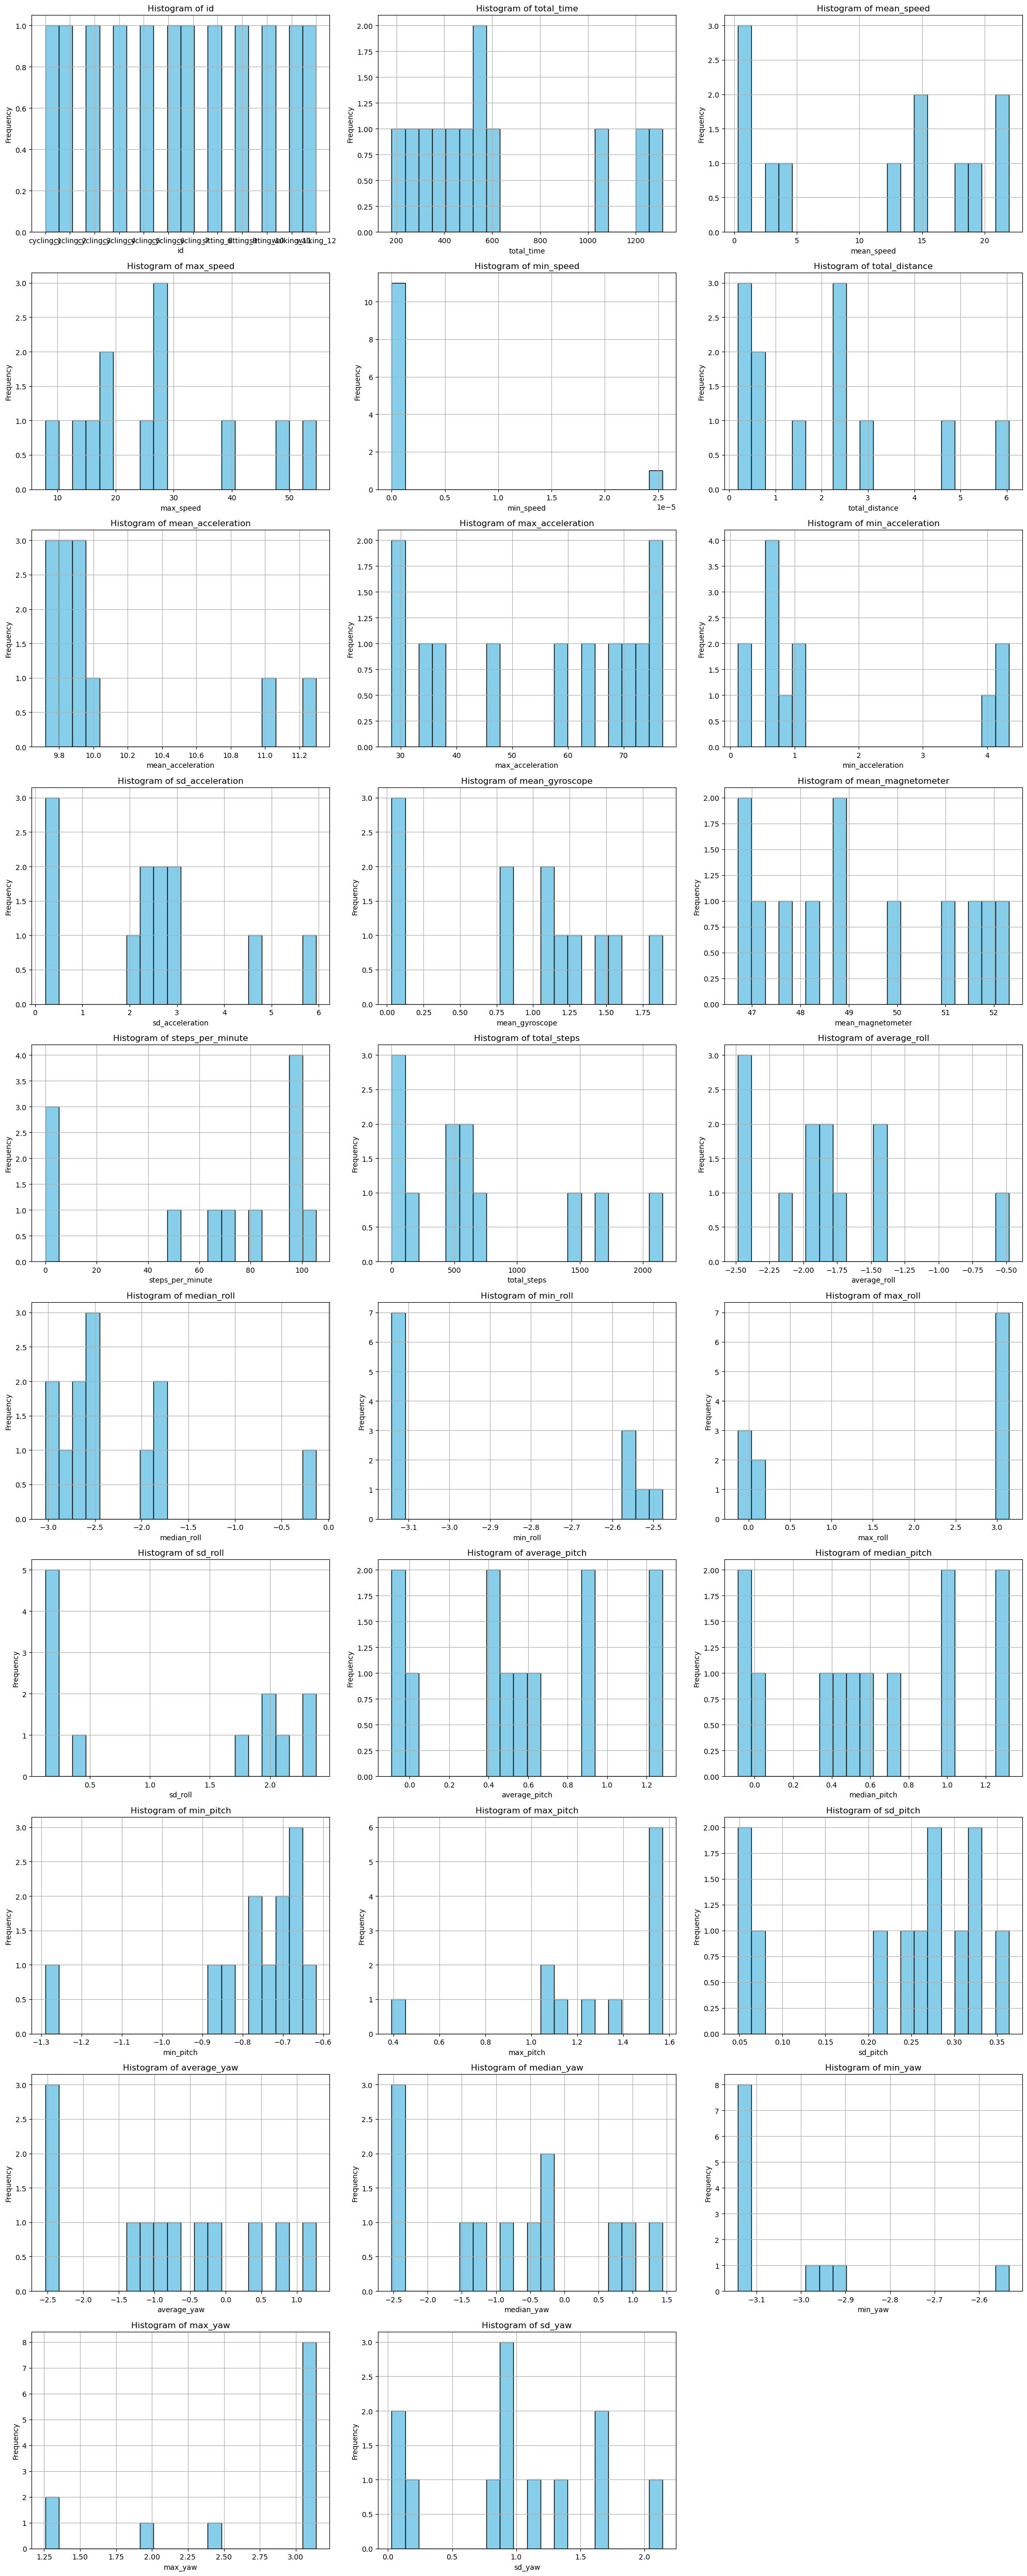

In [29]:
    num_columns = len(result.columns)
    num_rows = (num_columns + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  

    for i, column in enumerate(result.columns):
        axes[i].hist(result[column], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    
    # Ukrywanie pustych subplotów, jeśli istnieją
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    print()
    print()


There is one value in the min_speed column, so we drop it. Also id is not needed so we delete it.

In [30]:
result.drop(columns=['min_speed'], inplace=True)

### Heatmap of correlation

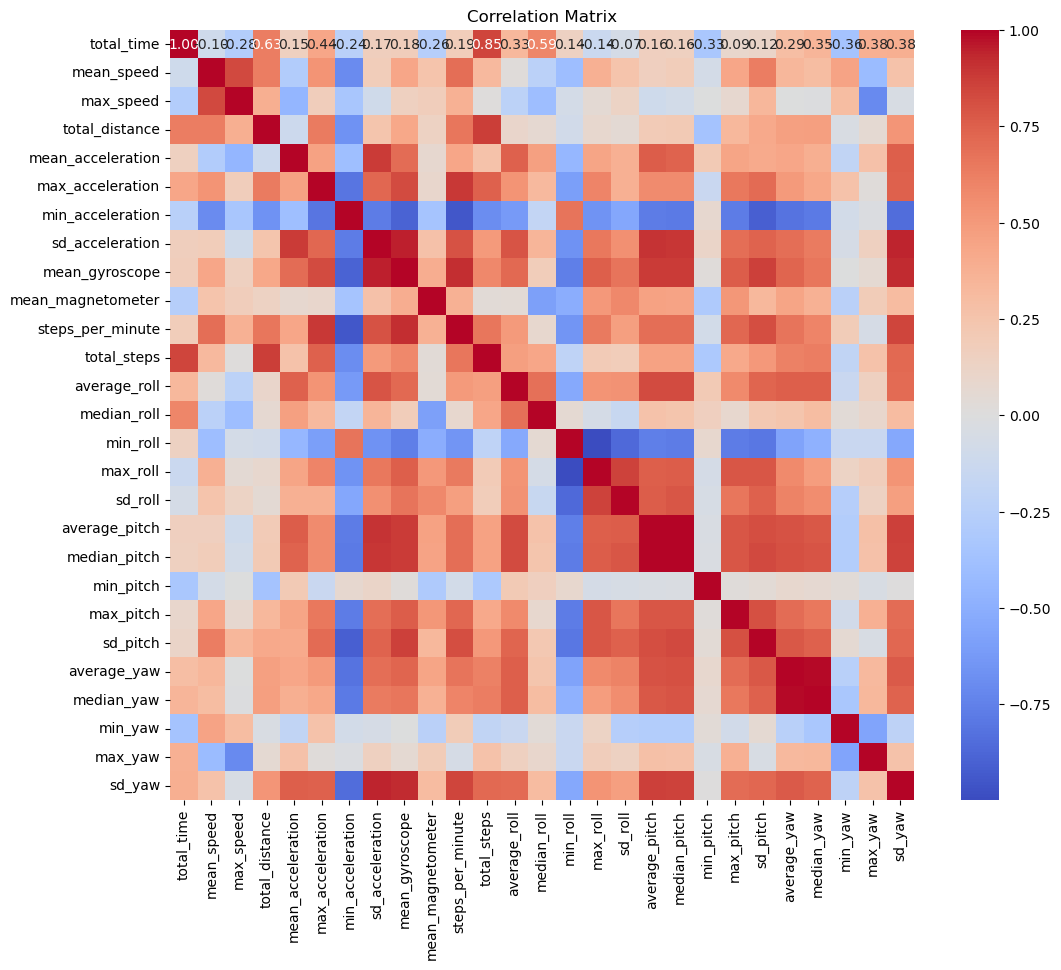

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [34]:
reduced_result = result.drop(columns=['sd_yaw', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

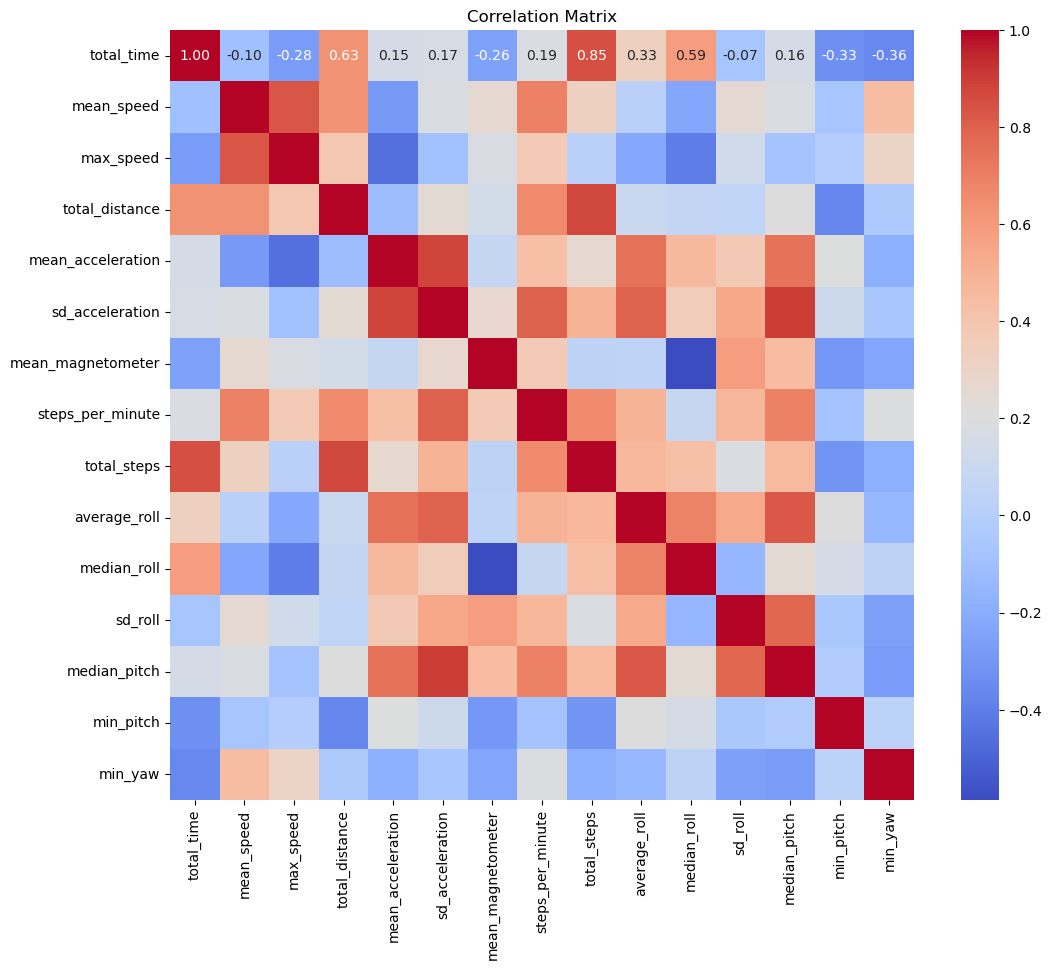

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:,reduced_result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Models**

Real labels from dataset.

In [37]:
real_labels = [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1]


We can now drop id from our data frame.

In [38]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 1156911.6167136172
Number of clusters: 3, Inertia: 480805.59620294545
Number of clusters: 4, Inertia: 230001.610086707
Number of clusters: 5, Inertia: 120414.47782610278
Number of clusters: 6, Inertia: 61446.43682885575
Number of clusters: 7, Inertia: 28141.758905332183
Number of clusters: 8, Inertia: 15495.474914317805
Number of clusters: 9, Inertia: 9137.161120233952
Number of clusters: 10, Inertia: 3484.8239462705337


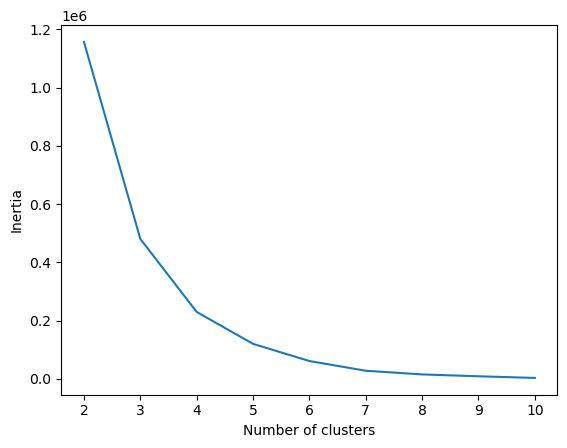

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [40]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

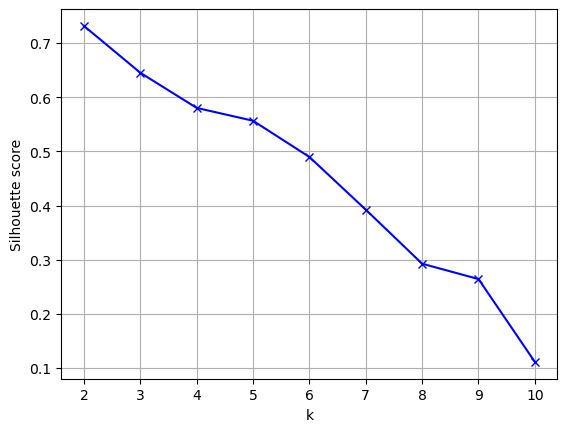

In [41]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

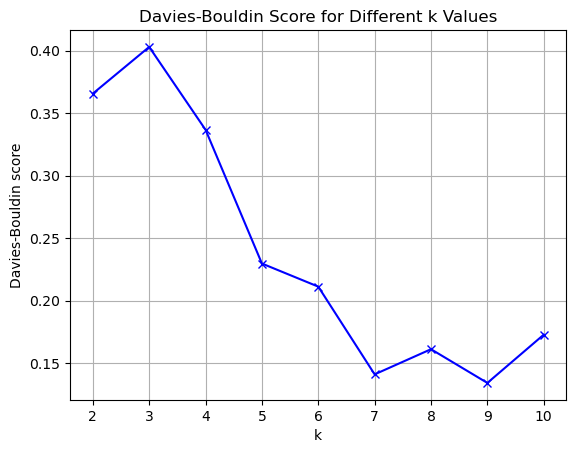

In [42]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

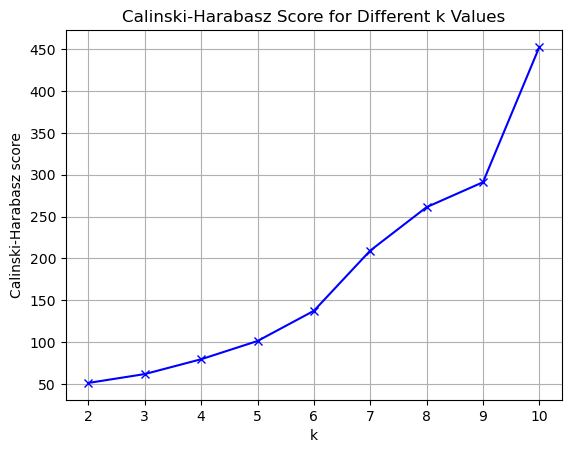

In [43]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [44]:
n_clusters = 3

### Function to do KMeans clustering

In [45]:
def doKmeans(X, nclust=n_clusters):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Labels: {clust_labels}")
    print(f"Model inertia: {model.inertia_}")
    print()
    i = 0
    for label in real_labels:
        if label == 0:
            plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
        elif label == 1:
            plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
        elif label == 2:
            plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
        i += 1
       
    #plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker=['o', 's', '^'], c=real_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()

### Tests

Basic

Labels: [0 2 2 1 1 2 2 0 0 0 2 1]
Model inertia: 480805.59620294545



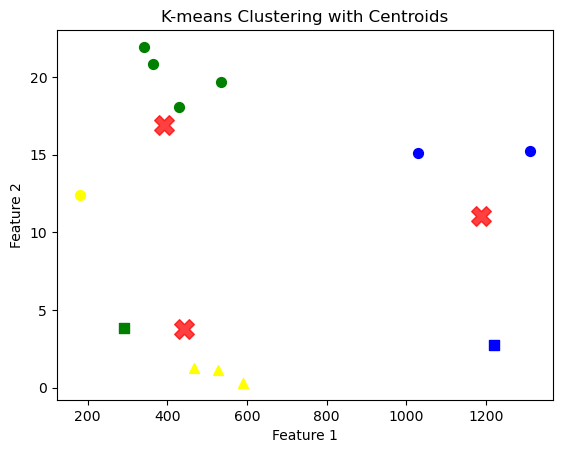

In [46]:
x = reduced_result.copy()
doKmeans(x, n_clusters)


Standarization

Labels: [0 0 0 0 0 0 0 2 2 2 1 1]
Model inertia: 86.3055805881336



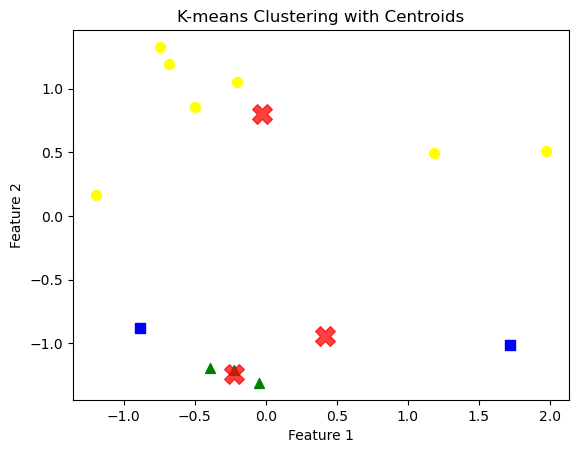

In [47]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters)


Normalization

Labels: [2 0 0 0 0 0 0 1 1 1 0 0]
Model inertia: 0.0735024434519286



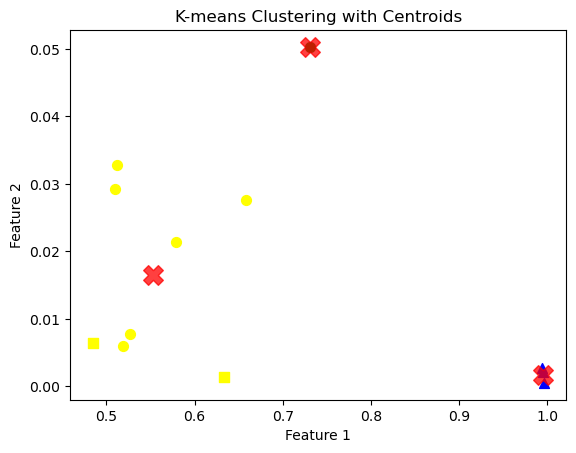

In [48]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters)

Normalization + standarization

Labels: [0 2 2 2 2 2 2 1 1 1 0 0]
Model inertia: 6.104170401423374



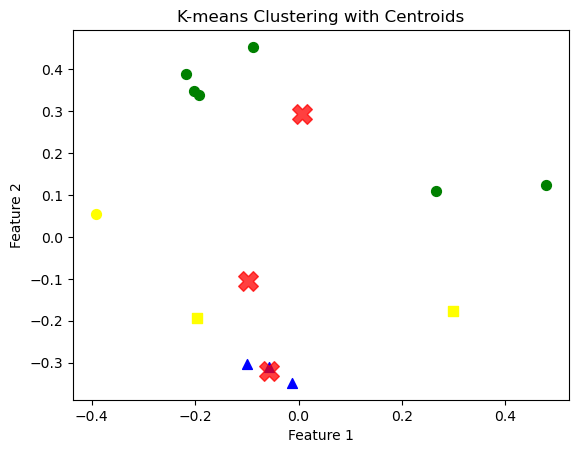

In [55]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters)

PowerTransformer

Labels: [2 0 0 0 0 0 0 1 1 1 2 2]
Model inertia: 73.76167820352993



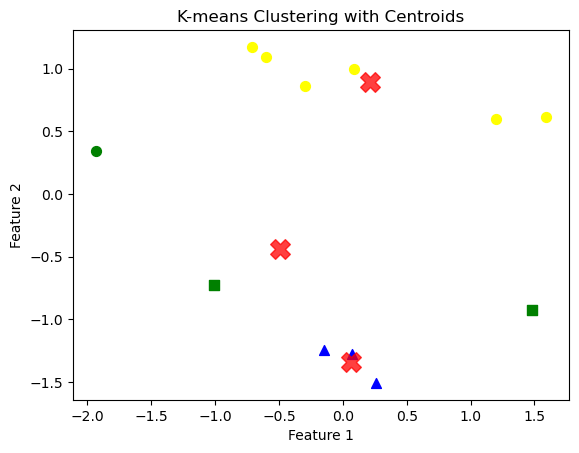

In [49]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters)

### PCA

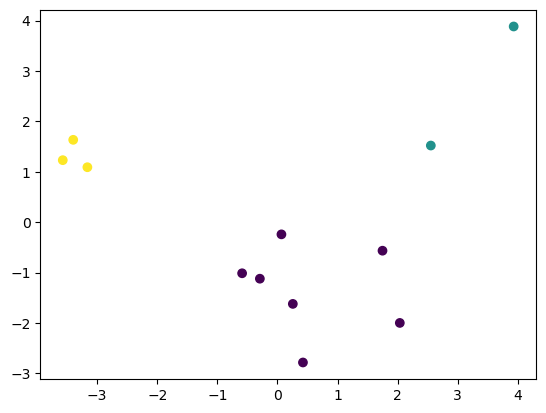

In [50]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=2)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)  
plt.show()

### Explained variance for PCA

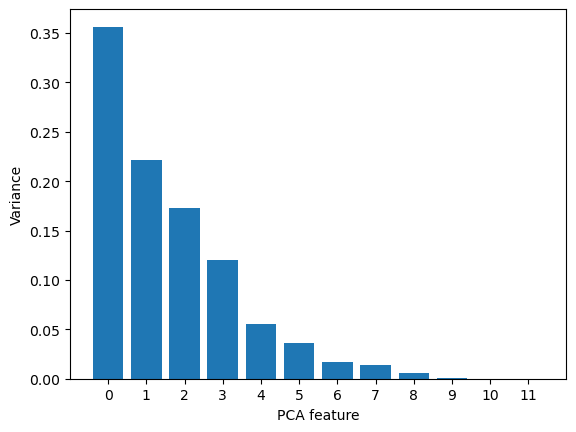

In [51]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

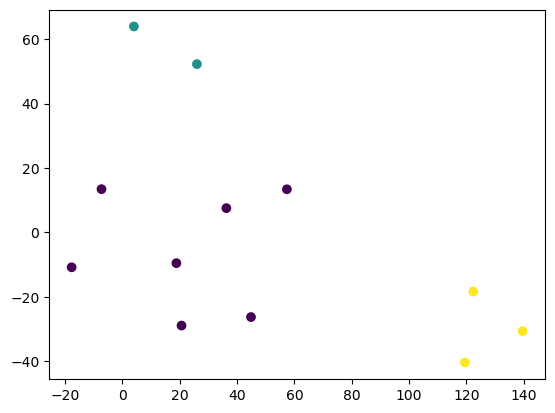

In [52]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100, perplexity=4)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()